In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('Clean_Dataset.csv')

In [7]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [9]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [10]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [11]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [12]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [13]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [14]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [15]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [16]:
df['duration'].min()

0.83

In [17]:
df['duration'].max()

49.83

In [18]:
df['duration'].median()

11.25

## Preprocessing

In [19]:
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('flight',axis=1)

df['class']=df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [20]:
df.stops=pd.factorize(df.stops)[0]

In [21]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [22]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)

In [23]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [24]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

print(df.head())

C:\Users\richa\AppData\Local\Temp\ipykernel_1992\2649857132.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


   stops  class  duration  days_left  price  airline_AirAsia  \
0      0      0      2.17          1   5953                0   
1      0      0      2.33          1   5953                0   
2      0      0      2.17          1   5956                1   
3      0      0      2.25          1   5955                0   
4      0      0      2.33          1   5955                0   

   airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  ...  \
0                  0                 0               0                 1  ...   
1                  0                 0               0                 1  ...   
2                  0                 0               0                 0  ...   
3                  0                 0               0                 0  ...   
4                  0                 0               0                 0  ...   

   arrival_Evening  arrival_Late_Night  arrival_Morning  arrival_Night  \
0                0                   0                

In [25]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training Regression Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y=df.drop('price', axis=1), df.price

In [27]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [28]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [29]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [30]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [31]:
reg.score(X_test, y_test)

0.9853801587488541

In [32]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:',  mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))      

R2: 0.9853801587488541
MAE: 1057.3683914267972
MSE: 7493155.9061554745
RMSE: 2737.36294746522


Text(0.5, 1.0, 'Prediction vs Actual Price')

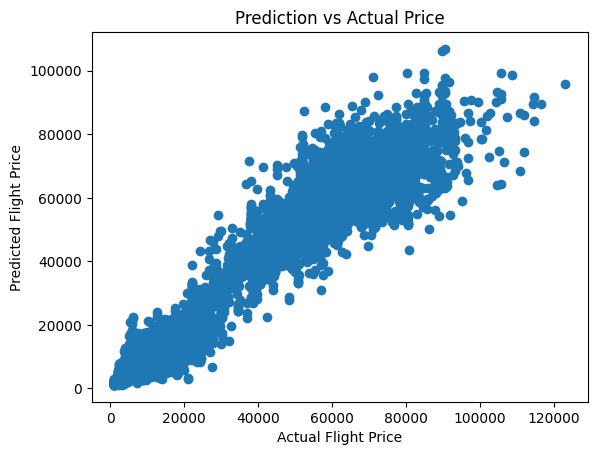

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')

In [41]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [42]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8797557697264955),
 ('duration', 0.0575907558598332),
 ('days_left', 0.018587135884591356),
 ('airline_Vistara', 0.005487541156568646),
 ('airline_Air_India', 0.004686643285141287),
 ('source_Delhi', 0.0037106349140244702),
 ('dest_Delhi', 0.0033283421412420213),
 ('source_Mumbai', 0.0023195534928648824),
 ('dest_Mumbai', 0.0019699576476653997),
 ('stops', 0.0018411297858314437),
 ('dest_Kolkata', 0.001783989063661866),
 ('source_Kolkata', 0.001661432454639514),
 ('dest_Hyderabad', 0.0016041703267250904),
 ('arrival_Evening', 0.0014482890772410145),
 ('source_Hyderabad', 0.0013406293211672277),
 ('dest_Bangalore', 0.0013029476009231912),
 ('arrival_Night', 0.001149482277566376),
 ('departure_Evening', 0.0010406104814778086),
 ('source_Bangalore', 0.00102019567214134),
 ('arrival_Afternoon', 0.0010096993630716753),
 ('source_Chennai', 0.0009169068012102535),
 ('departure_Morning', 0.000889539052882672),
 ('dest_Chennai', 0.0008119782887566504),
 ('departure_Afternoon', 0.00

In [55]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

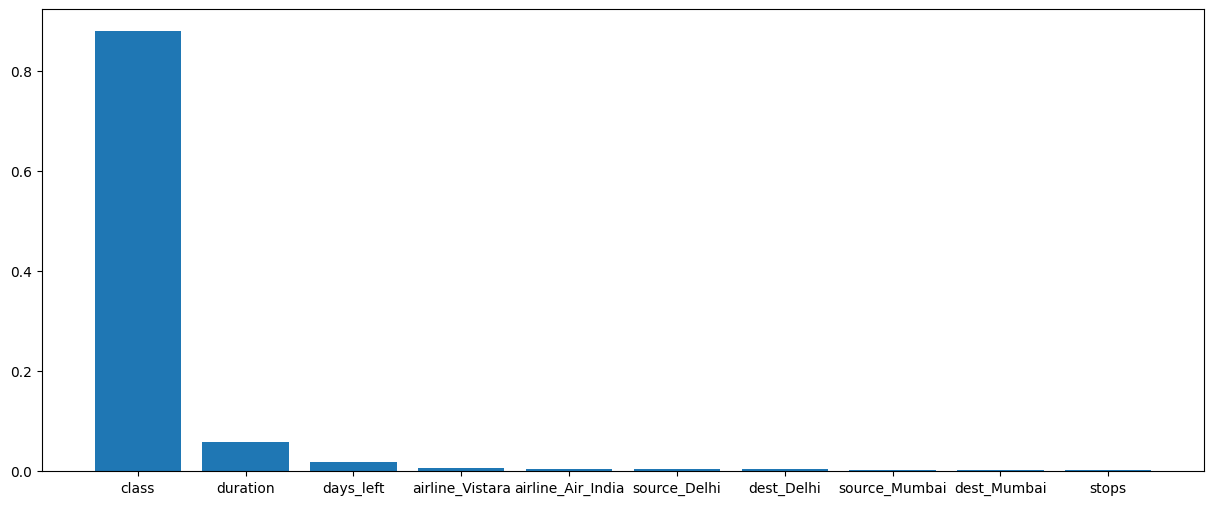

In [56]:
plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist={
    'n_estimators':randint(100, 300),
    'max_depth':[None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
     'max_features':[1.0, 'sqrt', 'log2', None]
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [62]:
best_regressor.score(X_test, y_test)

0.9863264603566085

In [66]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

# Print input features and corresponding predictions and actual targets for the first 10 entries
for i in range(min(10, len(X_test))):
    print(f"Input features: {X_test.iloc[i]}")  # Use .iloc[i] to access row by index for DataFrame
    print(f"Predicted output: {y_pred[i]}")
    print(f"Actual target: {y_test.iloc[i]}")   # Assuming y_test is also a pandas Series
    print("------------------------")

# Calculate and print evaluation metrics
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))



Input features: stops                       0.00
class                       0.00
duration                    2.33
days_left                  43.00
airline_AirAsia             0.00
airline_Air_India           0.00
airline_GO_FIRST            0.00
airline_Indigo              1.00
airline_SpiceJet            0.00
airline_Vistara             0.00
source_Bangalore            0.00
source_Chennai              0.00
source_Delhi                1.00
source_Hyderabad            0.00
source_Kolkata              0.00
source_Mumbai               0.00
dest_Bangalore              0.00
dest_Chennai                0.00
dest_Delhi                  0.00
dest_Hyderabad              0.00
dest_Kolkata                0.00
dest_Mumbai                 1.00
arrival_Afternoon           0.00
arrival_Early_Morning       0.00
arrival_Evening             0.00
arrival_Late_Night          0.00
arrival_Morning             1.00
arrival_Night               0.00
departure_Afternoon         0.00
departure_Early_Morning    

Text(0.5, 1.0, 'Prediction vs Actual Price')

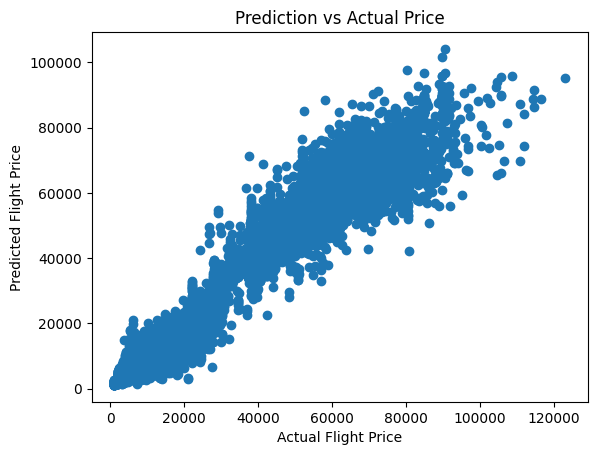

In [67]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')